## Logistic Regression

- 0또는 1로 예측해야 하나 Linear Regression을 그대로 적용하면 예측값이 0보다 작거나 1보다 큰 값을 가질 수 있음
- $h_\theta(x)$가 항상 0에서 1사이의 값을 갖도록 Hypothesis함수를 수정

- $g(z) = \frac{1}{1 + e^(-z)}$

In [1]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1/(1+np.exp(-z))

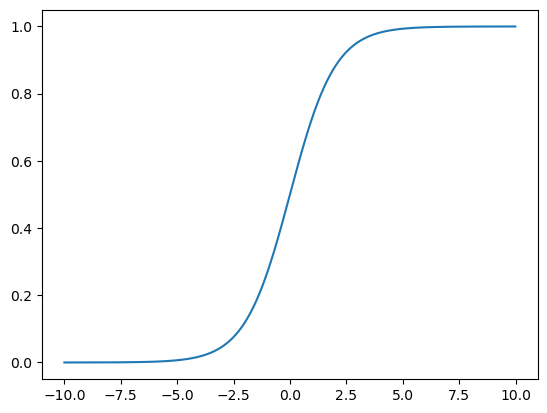

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(z, g);

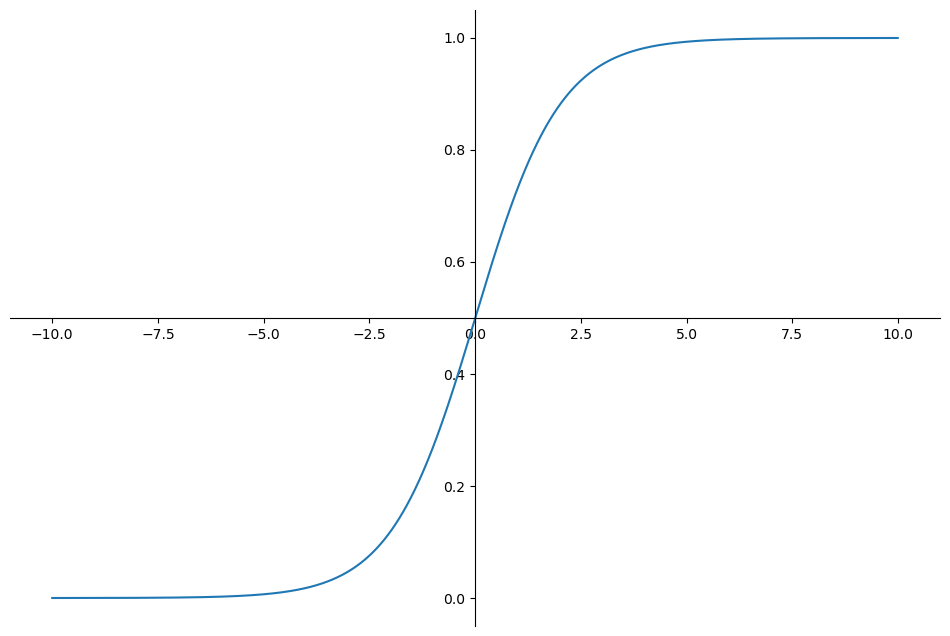

In [4]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(z,g)
ax.spines["left"].set_position('zero')
ax.spines["right"].set_color('none')
ax.spines["bottom"].set_position('center')
ax.spines["top"].set_color('none')

plt.show()

- Hypothesis 함수의 결과에 따른 분류
    - $h_\theta(x)$는 주어진 입력 x에서의 예측 결과가 1이 될 확률을 의미함

- Decision Boundary
    - $h_\theta(x)$ = $g(\theta_0 + \theta{x_1} + \theta{x_2})$

#### Cost Function

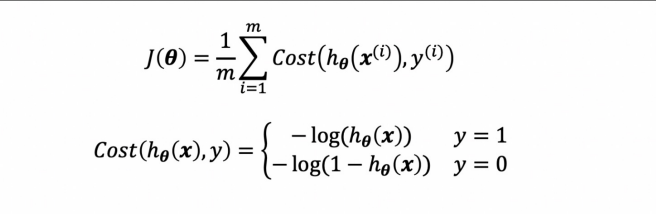

- learning 알고리즘은 regression과 동일

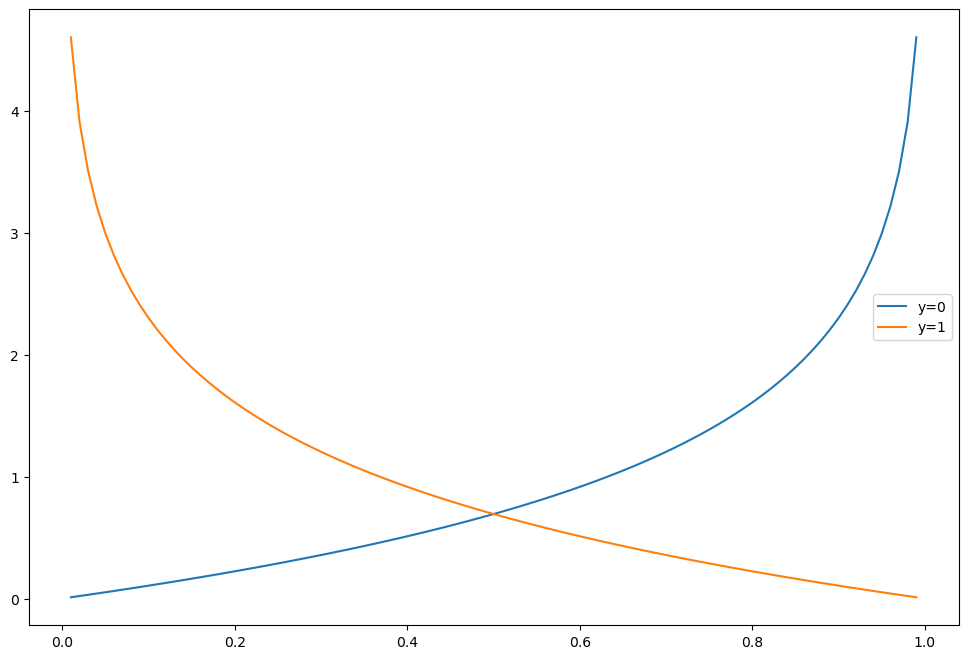

In [5]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, C0, label= 'y=0')
plt.plot(h, C1, label= 'y=1')
plt.legend()

plt.show()

In [8]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url)
wine.drop(columns='Unnamed: 0', inplace=True)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
wine["taste"] = [1. if grade >5 else 0. for grade in wine["quality"]]

X = wine.drop(["taste", 'quality'], axis= 1)
y = wine['taste']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=13)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7427361939580527
Test Acc:  0.7438461538461538


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)

In [13]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [15]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7444679622859341
Test Acc:  0.7469230769230769


In [16]:
# Decision Tree와의 비교를 위한 작업
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

models = {'logistic regression': pipe, 'decision tree':wine_tree}

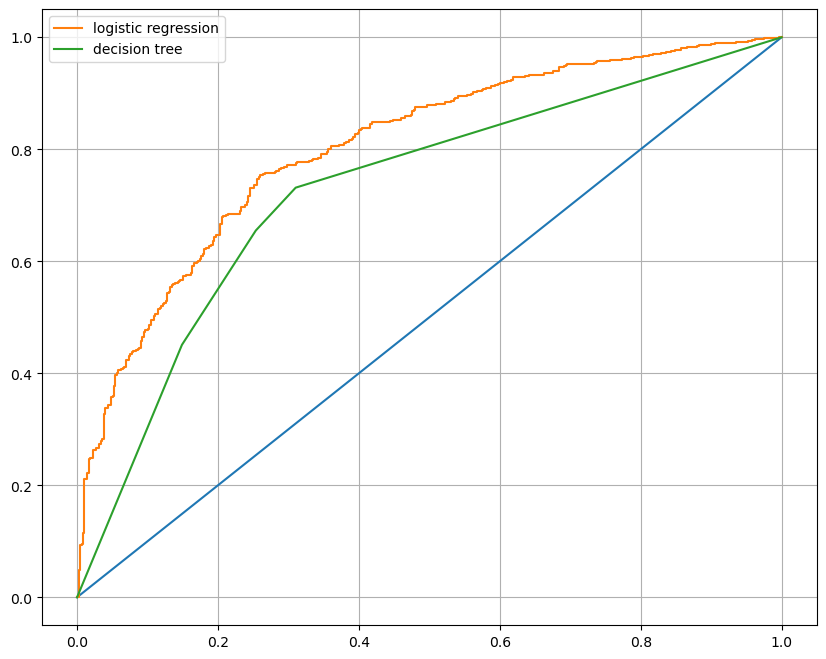

In [17]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1])

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label = model_name)

plt.grid()
plt.legend()
plt.show()

# PIMA 인디언 당뇨병 예측

In [18]:
import pandas as pd

PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


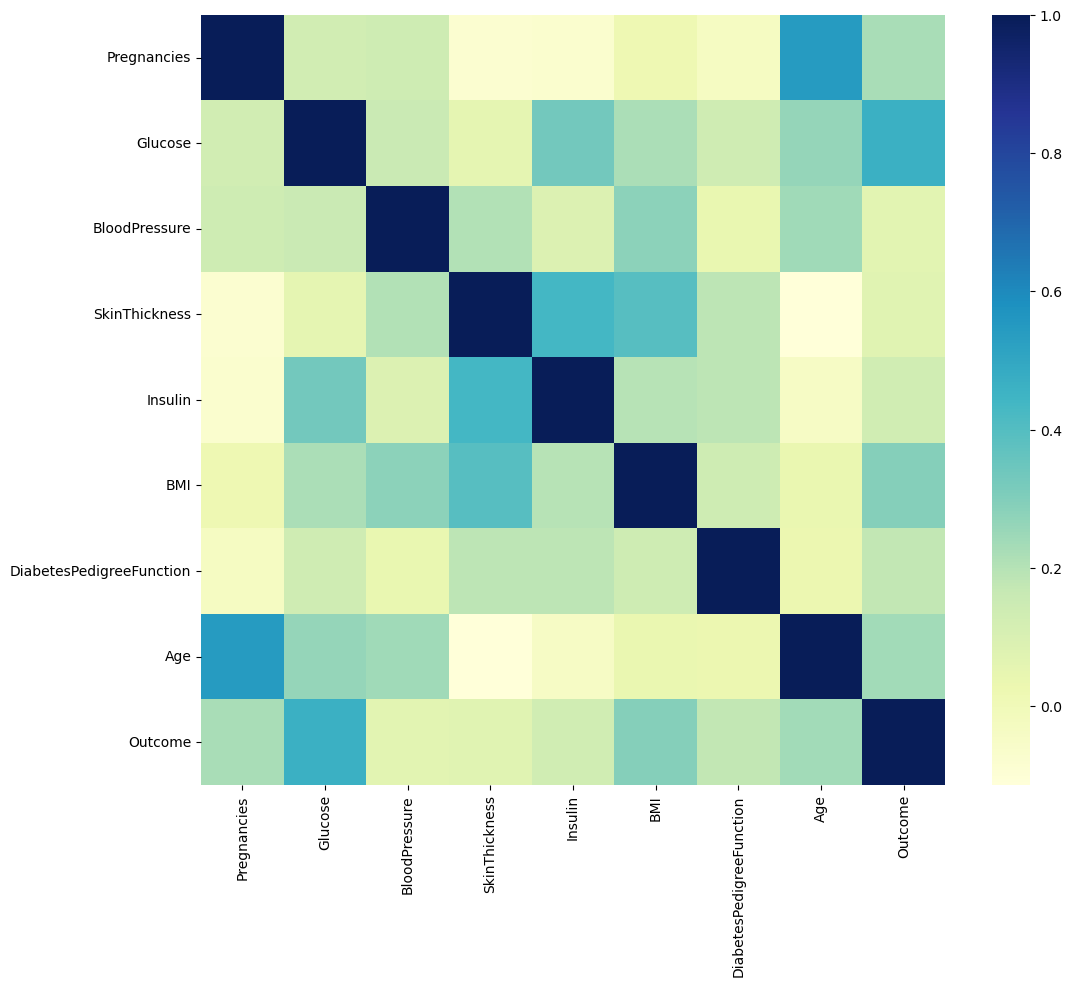

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), cmap='YlGnBu')
plt.show()

In [24]:
(PIMA == 0).astype(int).sum()
# 혈압에 0이라는 숫자는 결측치에 해당

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [25]:
zero_features = ['Glucose','BloodPressure','SkinThickness','BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X = PIMA.drop(['Outcome'], axis=1)
y = PIMA["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=13, stratify=y)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [('scaler', StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [28]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC Score : ', roc_auc_score(y_test, pred))
print('f1_score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
AUC Score :  0.7355555555555556
f1_score :  0.6534653465346535


In [30]:
# 다변수 방정식의 각 계수 값을 확인
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)
coeff

[0.35426588844126494,
 1.2014244425037581,
 -0.1584013553628671,
 0.03394657712929955,
 -0.16286471953988121,
 0.6204045219895111,
 0.3666935579557874,
 0.17195965447035094]

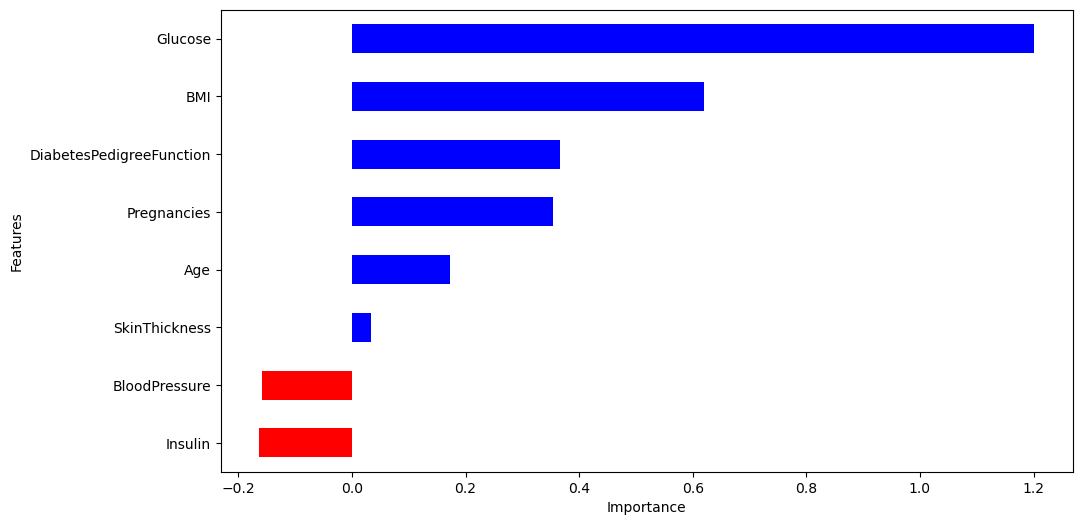

In [32]:
features = pd.DataFrame({'Features': labels, "importance": coeff})
features.sort_values(by=["importance"], ascending=True, inplace=True)
features["positive"] = features["importance"] > 0 
features.set_index('Features', inplace=True)
features["importance"].plot(kind='barh', figsize=(11,6), color=features['positive'].map({True:'blue', False:'red'}))

plt.xlabel('Importance')
plt.show()

- 포도당, BMI 등은 당뇨에 영향을 미치는 정도가 높다.
- 혈압은 예측에 부정적 영향을 준다.
- 연령이 BMI보다 출력 변수와 더 관련이 되어 있었지만, 모델은 BMI와 Glucose에 더 의존함

## Precision and Recall

- 정밀도와 재현율의 트레이드 오프

In [33]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url)
wine.drop(columns='Unnamed: 0', inplace=True)

wine["taste"] = [1. if grade >5 else 0. for grade in wine["quality"]]

X = wine.drop(["taste", 'quality'], axis= 1)
y = wine['taste']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=13)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7427361939580527
Test Acc:  0.7438461538461538


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]], dtype=int64)

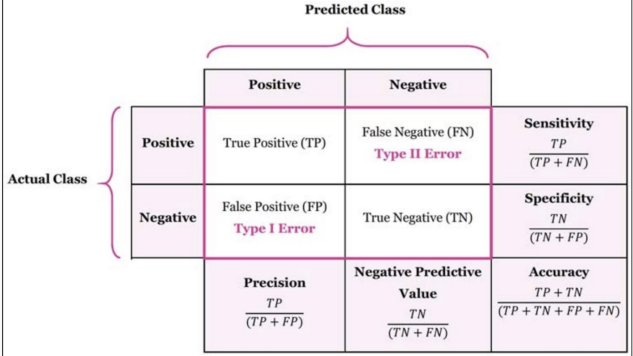

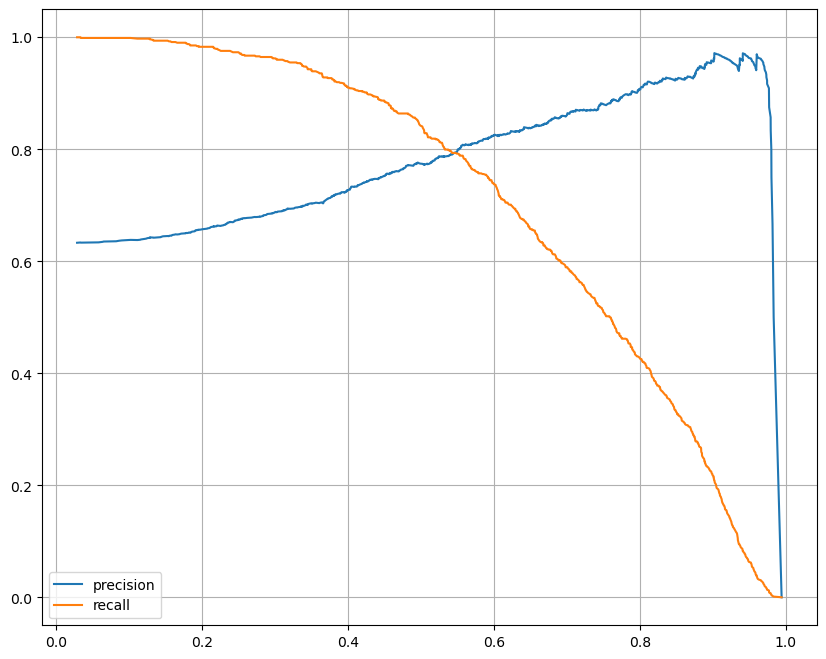

In [41]:
# precision_recall curve

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label="recall")
plt.grid(); plt.legend(); plt.show() 

In [42]:
pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40551059, 0.59448941],
       [0.50936198, 0.49063802],
       [0.10224467, 0.89775533]])

In [43]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1,1)], axis=1)

array([[0.40551059, 0.59448941, 1.        ],
       [0.50936198, 0.49063802, 0.        ],
       [0.10224467, 0.89775533, 1.        ],
       ...,
       [0.2256181 , 0.7743819 , 1.        ],
       [0.67386813, 0.32613187, 0.        ],
       [0.3144417 , 0.6855583 , 1.        ]])

In [44]:
#threshold바꿔보기 - Binarizer
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:,1]
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [45]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.73      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.73      0.74      1300



In [46]:
confusion_matrix(y_test, pred_bin)

array([[348, 129],
       [216, 607]], dtype=int64)

## 앙살블 기법

- 앙상블 학습을 통한 분류: 여러개의 분류기를 생성하고 그 예측을 결합하여 정확한 최종 예측을 기대하는 기법
- 목표: 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측 값을 얻는 것

- voting
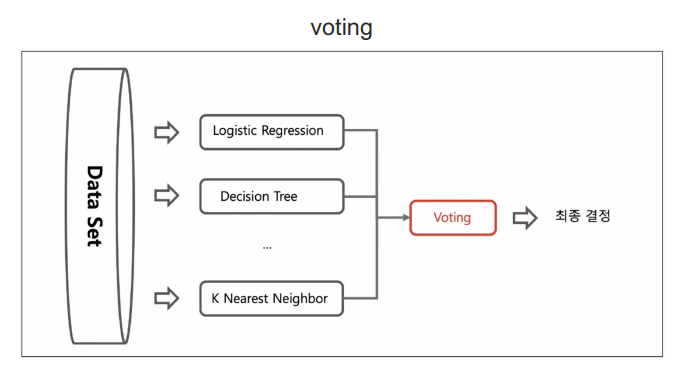

- bagging
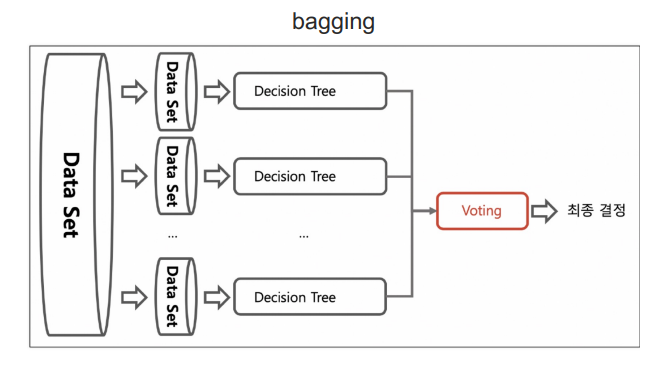

    - 베깅의 경우 데이터를 중복을 허용해서 샘플링하고 그 각각의 데이터에 같은 알고리즘을 적용해서 결과를 투표로 결정함
    - 각각의 분류기에 데이터를 각각 샘플링해서 추출하는 방식을 부트스트래핑 부할 방식이라고 함

- hard voting
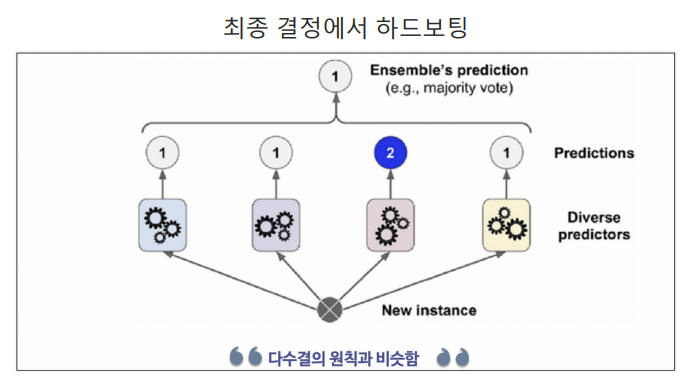

- soft voting
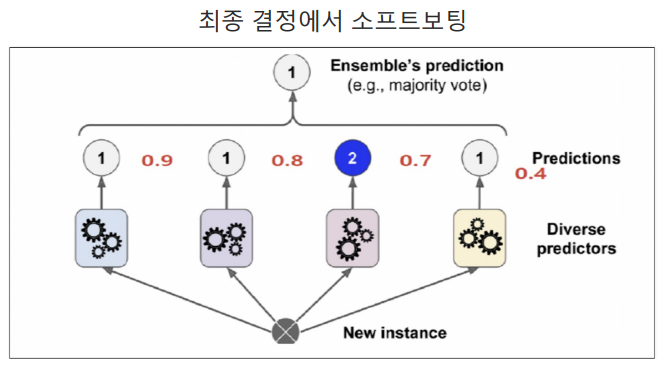

- 랜덤포레스트
    - 같은 알고리즘으로 구현하는 배깅의 대표적인 방법
    - 앙상블 방법 중에서 비교적 속도가 빠르며 다양한 영역에서 높은 성능을 보여줌
        - 부트스트래핑은 여러개의 작은 데이터 셋을 중첩을 허용해서 만드는 것
    - 랜덤 포레스트는 결정나무를 기본으로 함
        - 부트스크래핑으로 샘플링된 데이터마다 결정나무가 예측한 결과를 소프트보팅으로 최종 예측 결론을 얻음

## HAR(Human Activity Recognition)

- IMU센서를 활용해서 사람의 행동을 인식하는 실험

- UCI HAR 데이터셋
    - 허리에 스마트 폰을 착용하여 데이터를 얻음
        - 6가지 활동을 수행
        - 내장된 가속도계와 자이로 스코프를 사용하여 50Hz의 일정한 속도로 3축 선형 가속 및 3축 각속도를 갭처
    - 실험은 데이터를 수동을 라벨링 하기 위해 비디오로 기록함
        - 획득 한 데이터 세트는 무작위로 두 세트로 분할되었음
        - 훈련 데이터 생성을 위해 자원 봉사자의 70%가 선택되었고 테스트 데이터 30%가 선정
    - 중력 및 신체 운동 성분을 갖는 센서 가속 신호는 버터 워스 저역 통과 필터를 사용하여 신체 가속및 중력으로 분리함
        - 중력은 저주파 성분만을 갖는 것으로 가정하고 0.3Hz 차단 주파수를 가진 필터가 사용

- 데이터 특성
    - 가속도계로부터의 3축 가속도 (총 가속도) 및 추정된 신체 가속ㄷ
    - 자이로 스코프의 3축 각속도
    - 시간 및 주파수 영역 변수가 포함된 561 기능 벡터
    - 활동 라벨
    - 실험을 수행한 대상의 식별자

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
# 특성 이름
feature_name_df = pd.read_csv(url, sep='\s+', header= None, names=["column_index", 'colum_name'])
feature_name_df.head()

,column_index,colum_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [50]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [49]:
# X 데이터 읽어 오기
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'


X_train = pd.read_csv(X_train_url, sep='\s+', header= None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [51]:
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [52]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'


y_train = pd.read_csv(y_train_url, sep='\s+', header= None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [56]:
y_train['action'].value_counts()
# 1: Walking, 2: Walking Upstairs, 3: Walking Downstairs, 4: sitting, 5: standing, 6: Laying

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

In [58]:
# max_depth를 다양하게 하기 위해 gridsearchCV 이용
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv = 5, return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [59]:
grid_cv.best_score_

0.8543335321892183

In [60]:
grid_cv.best_params_

{'max_depth': 8}

In [61]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


In [62]:
max_depth =  [6,8,10,12,16,20,24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_Depth = ', depth, ', Accuracy = ', accuracy)


Max_Depth =  6 , Accuracy =  0.8557855446216491
Max_Depth =  8 , Accuracy =  0.8707159823549372
Max_Depth =  10 , Accuracy =  0.8673227010519172
Max_Depth =  12 , Accuracy =  0.8646080760095012
Max_Depth =  16 , Accuracy =  0.8574821852731591
Max_Depth =  20 , Accuracy =  0.8547675602307431
Max_Depth =  24 , Accuracy =  0.8547675602307431


In [63]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

### 랜덤포레스트 적용

In [65]:
# 랜덤포레스트 적용
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [6,8,10],
    'n_estimators' : [50,100,200],
    'min_samples_leaf': [8,12],
    'min_samples_split': [8,12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv =2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

C:\Users\qnwje\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [66]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [67]:
target_col = ['rank_test_score','mean_test_score','param_n_estimators','param_max_depth']

cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


In [68]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [69]:
grid_cv.best_score_

0.9151251360174102

In [70]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)

C:\Users\qnwje\AppData\Local\Temp\ipykernel_10536\102698656.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best.fit(X_train, y_train)


0.9205972175093315

In [71]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols
# 중요도가 개별적으로 높지 않다.

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

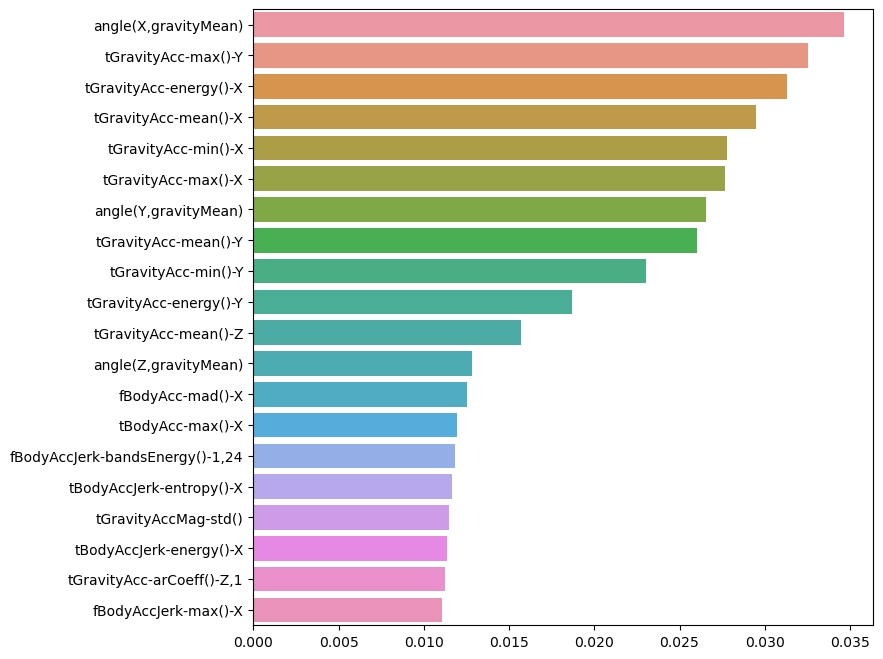

In [72]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x= top20_cols, y=top20_cols.index)
plt.show()

In [73]:
# 20개 특성만 가지고 다시 성능 확인

X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249

- 561개의 특성보다는 20개의 특성만 보면 연산속도는 빠르겠지만 acc는 일정부분 양보해야한다.